In [51]:
#Importing Necessary Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [37]:
#Loading Dataset
iris = load_iris()

In [38]:
#Creating dataframe of the loaded dataset and Displaying first few rows
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
#Splitting the dataset into features(X) and target(y)
X = df.drop('species', axis=1)
y = df['species']

In [65]:
#Splitting dataset into Training and Testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [66]:
#Initializing Classifier (DTC)
classifier = DecisionTreeClassifier()

In [67]:
#Training Decision Tree Classifier
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
#Making Predictions based on the testing data
y_pred = classifier.predict(X_test)

In [69]:
#Evaliating the model

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Classification Report: {class_report}")

Accuracy: 98.33%
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.97        19
           2       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



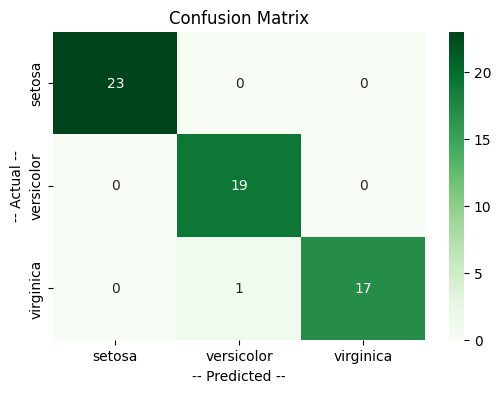

In [75]:
#Confusion Matrix
labels = ['Setosa','Versicolor','Virginica']
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=iris.target_names, yticklabels= iris.target_names)

# Add labels and title
plt.xlabel('-- Predicted --')
plt.ylabel('-- Actual --')
plt.title('Confusion Matrix')
plt.show()

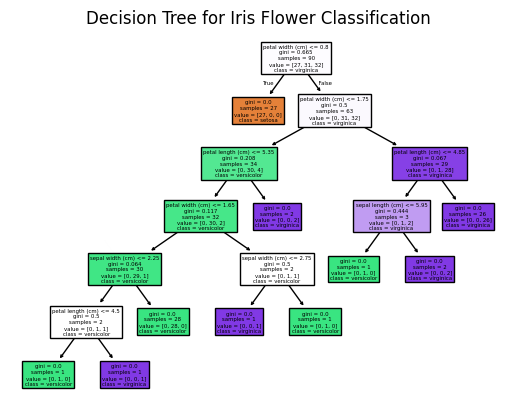

In [82]:
#Visualizing the Decision Tree
plt.Figure(figsize=(12,8))
plot_tree(classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Flower Classification")
plt.show()